# Import Library

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.transforms as mtransforms
import datetime
import math

# Fred Data

In [2]:
def gather_data(data_codes, start, 
                end = datetime.datetime.today(), freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [4]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
               
# Select start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
fed_data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "M")

In [ ]:
fed_data

# Load Data

In [66]:
data=pd.read_csv("data 1.csv")

In [67]:
data

Date  Base: Currency in Circulation ($ Mil)  \
0    2000-01-31                                 594.68   
1    2000-02-29                                 566.14   
2    2000-03-31                                 563.71   
3    2000-04-30                                 564.73   
4    2000-05-31                                 565.84   
..          ...                                    ...   
257  2021-06-30                                2178.84   
258  2021-07-31                                2186.13   
259  2021-08-31                                2187.63   
260  2021-09-30                                2194.90   
261  2021-10-31                                2202.51   

     Balance Sheet: Total Assets ($ Mil)  Effective Federal Funds Rate  \
0                                   0.00                          5.45   
1                                   0.00                          5.73   
2                                   0.00                          5.85   
3                                   0.00                          6.02   
4                                   0.00                          6.27   
..                                   ...                           ...   
257                           8026555.20                          0.08   
258                           8190356.75                          0.10   
259                           8291893.25                          0.09   
260                           8418612.40                          0.08   
261                           8516524.50                          0.08   

     Adj Close  Log Total Asset  Currency in Circulation/Total Asset  \
0      1394.46         0.000000                             0.000000   
1      1366.42         0.000000                             0.000000   
2      1498.58         0.000000                             0.000000   
3      1452.43         0.000000                             1.000000   
4      1420.60         0.000000                             0.000000   
..         ...              ...                                  ...   
257    4297.50        15.898266                             0.000271   
258    4395.26        15.918468                             0.000267   
259    4522.68        15.930789                             0.000264   
260    4307.54        15.945956                             0.000261   
261    4605.38        15.957519                             0.000259   

     Log Stock Price  Unemployment Rate  
0           7.240263                4.1  
1           7.219949                4.0  
2           7.312273                3.8  
3           7.280993                4.0  
4           7.258835                4.0  
..               ...                ...  
257         8.365789                5.4  
258         8.388282                5.2  
259         8.416860                4.8  
260         8.368122                4.6  
261         8.434980                4.2  

[262 rows x 9 columns]

In [68]:
data.dtypes

Date                                      object
Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
Log Total Asset                          float64
Currency in Circulation/Total Asset      float64
Log Stock Price                          float64
Unemployment Rate                        float64
dtype: object

In [69]:
data = data.set_index('Date')

In [70]:
data

Base: Currency in Circulation ($ Mil)  \
Date                                                
2000-01-31                                 594.68   
2000-02-29                                 566.14   
2000-03-31                                 563.71   
2000-04-30                                 564.73   
2000-05-31                                 565.84   
...                                           ...   
2021-06-30                                2178.84   
2021-07-31                                2186.13   
2021-08-31                                2187.63   
2021-09-30                                2194.90   
2021-10-31                                2202.51   

            Balance Sheet: Total Assets ($ Mil)  Effective Federal Funds Rate  \
Date                                                                            
2000-01-31                                 0.00                          5.45   
2000-02-29                                 0.00                          5.73   
2000-03-31                                 0.00                          5.85   
2000-04-30                                 0.00                          6.02   
2000-05-31                                 0.00                          6.27   
...                                         ...                           ...   
2021-06-30                           8026555.20                          0.08   
2021-07-31                           8190356.75                          0.10   
2021-08-31                           8291893.25                          0.09   
2021-09-30                           8418612.40                          0.08   
2021-10-31                           8516524.50                          0.08   

            Adj Close  Log Total Asset  Currency in Circulation/Total Asset  \
Date                                                                          
2000-01-31    1394.46         0.000000                             0.000000   
2000-02-29    1366.42         0.000000                             0.000000   
2000-03-31    1498.58         0.000000                             0.000000   
2000-04-30    1452.43         0.000000                             1.000000   
2000-05-31    1420.60         0.000000                             0.000000   
...               ...              ...                                  ...   
2021-06-30    4297.50        15.898266                             0.000271   
2021-07-31    4395.26        15.918468                             0.000267   
2021-08-31    4522.68        15.930789                             0.000264   
2021-09-30    4307.54        15.945956                             0.000261   
2021-10-31    4605.38        15.957519                             0.000259   

            Log Stock Price  Unemployment Rate  
Date                                            
2000-01-31         7.240263                4.1  
2000-02-29         7.219949                4.0  
2000-03-31         7.312273                3.8  
2000-04-30         7.280993                4.0  
2000-05-31         7.258835                4.0  
...                     ...                ...  
2021-06-30         8.365789                5.4  
2021-07-31         8.388282                5.2  
2021-08-31         8.416860                4.8  
2021-09-30         8.368122                4.6  
2021-10-31         8.434980                4.2  

[262 rows x 8 columns]

In [71]:
data_new = data.drop(['Base: Currency in Circulation ($ Mil)', 'Balance Sheet: Total Assets ($ Mil)', 'Adj Close'], axis=1)

In [72]:
data_new

Effective Federal Funds Rate  Log Total Asset  \
Date                                                        
2000-01-31                          5.45         0.000000   
2000-02-29                          5.73         0.000000   
2000-03-31                          5.85         0.000000   
2000-04-30                          6.02         0.000000   
2000-05-31                          6.27         0.000000   
...                                  ...              ...   
2021-06-30                          0.08        15.898266   
2021-07-31                          0.10        15.918468   
2021-08-31                          0.09        15.930789   
2021-09-30                          0.08        15.945956   
2021-10-31                          0.08        15.957519   

            Currency in Circulation/Total Asset  Log Stock Price  \
Date                                                               
2000-01-31                             0.000000         7.240263   
2000-02-29                             0.000000         7.219949   
2000-03-31                             0.000000         7.312273   
2000-04-30                             1.000000         7.280993   
2000-05-31                             0.000000         7.258835   
...                                         ...              ...   
2021-06-30                             0.000271         8.365789   
2021-07-31                             0.000267         8.388282   
2021-08-31                             0.000264         8.416860   
2021-09-30                             0.000261         8.368122   
2021-10-31                             0.000259         8.434980   

            Unemployment Rate  
Date                           
2000-01-31                4.1  
2000-02-29                4.0  
2000-03-31                3.8  
2000-04-30                4.0  
2000-05-31                4.0  
...                       ...  
2021-06-30                5.4  
2021-07-31                5.2  
2021-08-31                4.8  
2021-09-30                4.6  
2021-10-31                4.2  

[262 rows x 5 columns]

In [89]:
data_new = data_new.loc['2008-01-31':'2020-10-31']

In [90]:
data_graph=pd.read_csv("data 2.csv")

In [91]:
data_graph

Date  Base: Currency in Circulation ($ Mil)  \
0    2008-01-31                                 817.37   
1    2008-02-29                                 814.43   
2    2008-03-31                                 816.64   
3    2008-04-30                                 813.94   
4    2008-05-31                                 817.69   
..          ...                                    ...   
161  2021-06-30                                2178.84   
162  2021-07-31                                2186.13   
163  2021-08-31                                2187.63   
164  2021-09-30                                2194.90   
165  2021-10-31                                2202.51   

     Balance Sheet: Total Assets ($ Mil)  Effective Federal Funds Rate  \
0                              894807.80                          3.94   
1                              881700.25                          2.98   
2                              890096.00                          2.61   
3                              886510.60                          2.28   
4                              892986.00                          1.98   
..                                   ...                           ...   
161                           8026555.20                          0.08   
162                           8190356.75                          0.10   
163                           8291893.25                          0.09   
164                           8418612.40                          0.08   
165                           8516524.50                          0.08   

     Adj Close  Log Total Asset  Currency in Circulation/Total Asset  \
0      1378.55        13.704364                             0.000913   
1      1330.63        13.689607                             0.000924   
2      1322.70        13.699085                             0.000917   
3      1385.59        13.695048                             0.000918   
4      1400.38        13.702326                             0.000916   
..         ...              ...                                  ...   
161    4297.50        15.898266                             0.000271   
162    4395.26        15.918468                             0.000267   
163    4522.68        15.930789                             0.000264   
164    4307.54        15.945956                             0.000261   
165    4605.38        15.957519                             0.000259   

     Log Stock Price  Unemployment Rate  
0           7.228788                4.9  
1           7.193408                5.1  
2           7.187430                5.0  
3           7.233881                5.4  
4           7.244499                5.6  
..               ...                ...  
161         8.365789                5.4  
162         8.388282                5.2  
163         8.416860                4.8  
164         8.368122                4.6  
165         8.434980                4.2  

[166 rows x 9 columns]

In [92]:
data_graph = data_graph.set_index('Date')

In [93]:
data_graph

Base: Currency in Circulation ($ Mil)  \
Date                                                
2008-01-31                                 817.37   
2008-02-29                                 814.43   
2008-03-31                                 816.64   
2008-04-30                                 813.94   
2008-05-31                                 817.69   
...                                           ...   
2021-06-30                                2178.84   
2021-07-31                                2186.13   
2021-08-31                                2187.63   
2021-09-30                                2194.90   
2021-10-31                                2202.51   

            Balance Sheet: Total Assets ($ Mil)  Effective Federal Funds Rate  \
Date                                                                            
2008-01-31                            894807.80                          3.94   
2008-02-29                            881700.25                          2.98   
2008-03-31                            890096.00                          2.61   
2008-04-30                            886510.60                          2.28   
2008-05-31                            892986.00                          1.98   
...                                         ...                           ...   
2021-06-30                           8026555.20                          0.08   
2021-07-31                           8190356.75                          0.10   
2021-08-31                           8291893.25                          0.09   
2021-09-30                           8418612.40                          0.08   
2021-10-31                           8516524.50                          0.08   

            Adj Close  Log Total Asset  Currency in Circulation/Total Asset  \
Date                                                                          
2008-01-31    1378.55        13.704364                             0.000913   
2008-02-29    1330.63        13.689607                             0.000924   
2008-03-31    1322.70        13.699085                             0.000917   
2008-04-30    1385.59        13.695048                             0.000918   
2008-05-31    1400.38        13.702326                             0.000916   
...               ...              ...                                  ...   
2021-06-30    4297.50        15.898266                             0.000271   
2021-07-31    4395.26        15.918468                             0.000267   
2021-08-31    4522.68        15.930789                             0.000264   
2021-09-30    4307.54        15.945956                             0.000261   
2021-10-31    4605.38        15.957519                             0.000259   

            Log Stock Price  Unemployment Rate  
Date                                            
2008-01-31         7.228788                4.9  
2008-02-29         7.193408                5.1  
2008-03-31         7.187430                5.0  
2008-04-30         7.233881                5.4  
2008-05-31         7.244499                5.6  
...                     ...                ...  
2021-06-30         8.365789                5.4  
2021-07-31         8.388282                5.2  
2021-08-31         8.416860                4.8  
2021-09-30         8.368122                4.6  
2021-10-31         8.434980                4.2  

[166 rows x 8 columns]

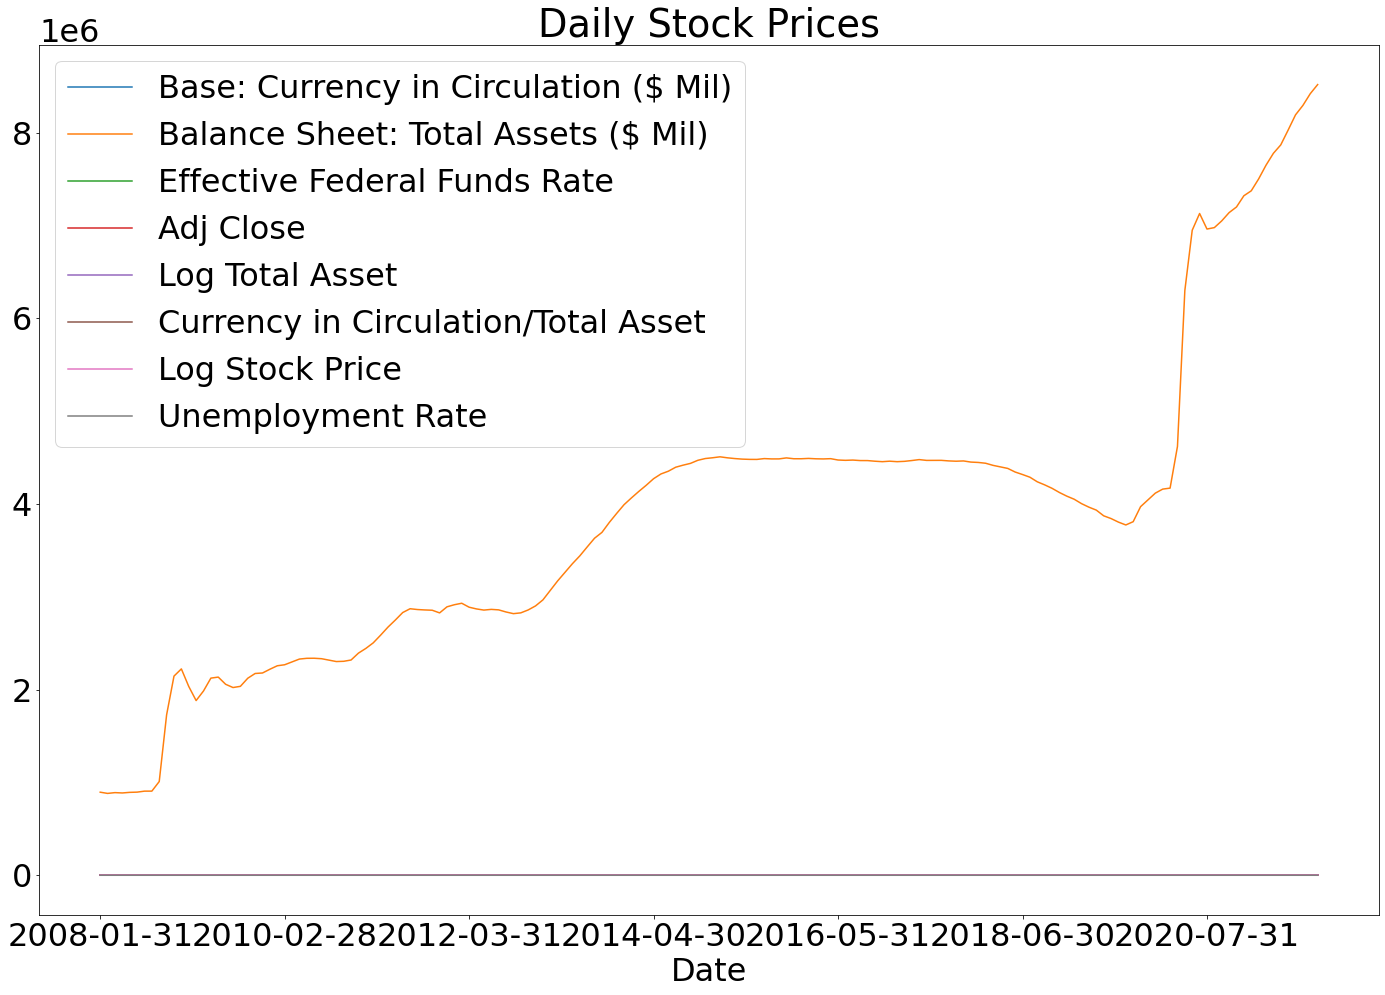

In [94]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})

fig, ax = plt.subplots(figsize = (24,16))
data_graph.plot.line(ax = ax, legend = True)

plt.title("Daily Stock Prices")
plt.show()
plt.close()

In [95]:
plt.line(data_updated['Effective Federal Funds Rate'], data_updated['Adj Close'], color='Red')
plt.title('Stock Index Price Vs Federal Funds Rate', fontsize=14)
plt.xlabel('Effective Federal Funds Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

In [ ]:
plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(gas.Year, gas.USA, 'b.-', label='United States')
plt.plot(gas.Year, gas.Canada, 'r.-')
plt.plot(gas.Year, gas['South Korea'], 'g.-')
plt.plot(gas.Year, gas.Australia, 'y.-')

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('Gas_price_figure.png', dpi=300)

plt.show()

In [88]:
data_new

Empty DataFrame
Columns: [Effective Federal Funds Rate, Log Total Asset, Currency in Circulation/Total Asset, Log Stock Price, Unemployment Rate]
Index: []

In [85]:
data_new.columns

Index(['Effective Federal Funds Rate', 'Log Total Asset',
       'Currency in Circulation/Total Asset', 'Log Stock Price',
       'Unemployment Rate'],
      dtype='object')

In [86]:
data_new.diff()

Empty DataFrame
Columns: [Effective Federal Funds Rate, Log Total Asset, Currency in Circulation/Total Asset, Log Stock Price, Unemployment Rate]
Index: []

In [77]:
data_stock =  data_new.diff()

In [78]:
data_stock

Empty DataFrame
Columns: [Effective Federal Funds Rate, Log Total Asset, Currency in Circulation/Total Asset, Log Stock Price, Unemployment Rate]
Index: []

In [79]:
data_updated = data_stock.dropna()

In [80]:
data_updated

Empty DataFrame
Columns: [Effective Federal Funds Rate, Log Total Asset, Currency in Circulation/Total Asset, Log Stock Price, Unemployment Rate]
Index: []

In [22]:
data_updated.isnull().sum()

Effective Federal Funds Rate           0
Log Total Asset                        0
Currency in Circulation/Total Asset    0
Log Stock Price                        0
Unemployment Rate                      0
dtype: int64

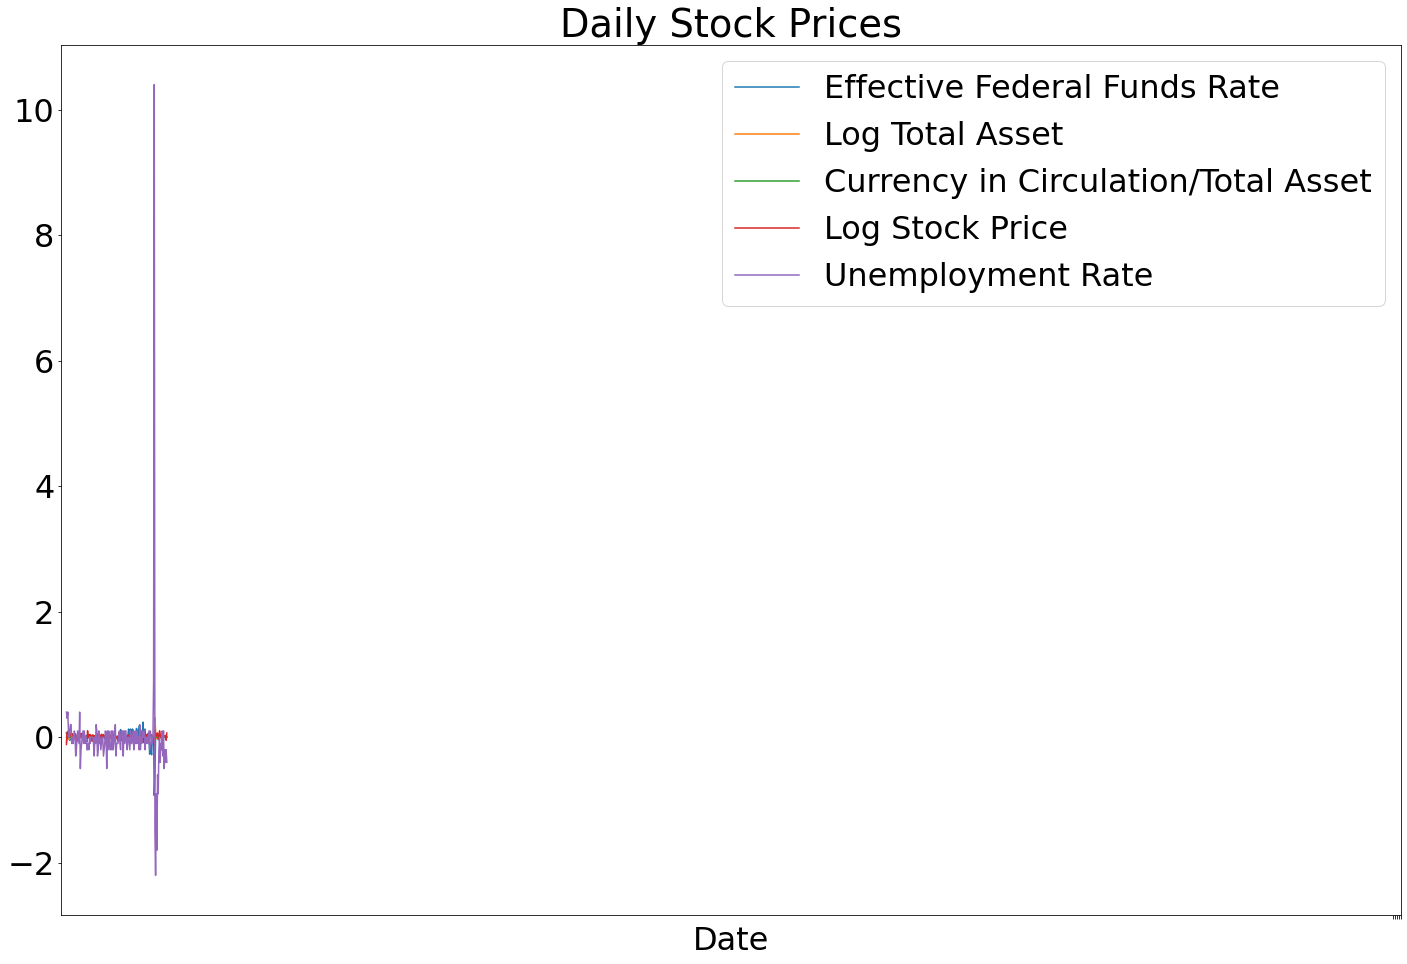

In [65]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})

fig, ax = plt.subplots(figsize = (24,16))
data_updated.plot.line(ax = ax, legend = True)
plt.xticks([2009,2012,2015,2018,2021])

plt.title("Daily Stock Prices")
plt.show()
plt.close()

In [23]:
# get the summary
desc_df = data_updated.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

Effective Federal Funds Rate  Log Total Asset  \
count                     153.000000       153.000000   
mean                       -0.000458         0.009360   
std                         0.107375         0.031180   
min                        -0.930000        -0.077786   
25%                        -0.010000        -0.001927   
50%                         0.000000         0.002383   
75%                         0.010000         0.016727   
max                         0.240000         0.310113   
+3_std                      0.321668         0.102900   
-3_std                     -0.322583        -0.084180   

        Currency in Circulation/Total Asset  Log Stock Price  \
count                          1.530000e+02       153.000000   
mean                          -1.157529e-06         0.011232   
std                            1.068846e-05         0.041633   
min                           -9.568000e-05        -0.133668   
25%                           -3.443000e-06        -0.007526   
50%                            8.780000e-07         0.017726   
75%                            3.022000e-06         0.035100   
max                            3.948700e-05         0.119421   
+3_std                         3.090786e-05         0.136132   
-3_std                        -3.322292e-05        -0.113667   

        Unemployment Rate  
count          153.000000  
mean            -0.026797  
std              0.908440  
min             -2.200000  
25%             -0.200000  
50%             -0.100000  
75%              0.100000  
max             10.400000  
+3_std           2.698524  
-3_std          -2.752119

# Build Model

In [24]:
X = data_updated.drop('Log Stock Price', axis = 1)
Y = data_updated[['Log Stock Price']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


regression_model = LinearRegression()


regression_model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

# Exploring the Output

In [25]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 0.01259
----------------------------------------------------------------------------------------------------
The Coefficient for Effective Federal Funds Rate is -0.016
The Coefficient for Log Total Asset is -0.62
The Coefficient for Currency in Circulation/Total Asset is -2.9e+03
The Coefficient for Unemployment Rate is -0.019


# Evaluating the Model

In [26]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

C:\Users\proma.gupta\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[ 0.01504395],
       [-0.00394883],
       [ 0.00721112],
       [ 0.00850784],
       [ 0.01014888]])

In [28]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

C:\Users\proma.gupta\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Checking for Heteroscedasticity

In [29]:
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.3512441342490251 0.3576171816128195
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.3512
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


# Checking for Autocorrelation

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1065
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


C:\Users\proma.gupta\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


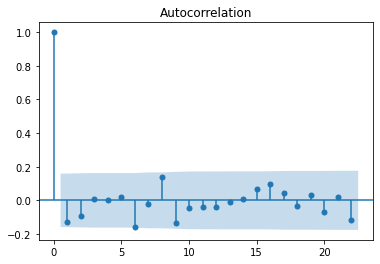

In [30]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

### OLS

In [31]:
y_var = ["Log Stock Price"]
x_vars = ["Log Total Asset",
         "Currency in Circulation/Total Asset",
         "Effective Federal Funds Rate",
         "Unemployment Rate"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

Log Stock Price  Log Total Asset  \
Date                                           
1/31/2000          7.240263         0.000000   
2/29/2000          7.219949         0.000000   
3/31/2000          7.312273         0.000000   
4/30/2000          7.280993         0.000000   
5/31/2000          7.258835         0.000000   
...                     ...              ...   
6/30/2021          8.365789        15.898266   
7/31/2021          8.388282        15.918468   
8/31/2021          8.416860        15.930789   
9/30/2021          8.368122        15.945956   
10/31/2021         8.434980        15.957519   

            Currency in Circulation/Total Asset  Effective Federal Funds Rate  \
Date                                                                            
1/31/2000                              0.000000                          5.45   
2/29/2000                              0.000000                          5.73   
3/31/2000                              0.000000                          5.85   
4/30/2000                              1.000000                          6.02   
5/31/2000                              0.000000                          6.27   
...                                         ...                           ...   
6/30/2021                              0.000271                          0.08   
7/31/2021                              0.000267                          0.10   
8/31/2021                              0.000264                          0.09   
9/30/2021                              0.000261                          0.08   
10/31/2021                             0.000259                          0.08   

            Unemployment Rate  
Date                           
1/31/2000                 4.1  
2/29/2000                 4.0  
3/31/2000                 3.8  
4/30/2000                 4.0  
5/31/2000                 4.0  
...                       ...  
6/30/2021                 5.4  
7/31/2021                 5.2  
8/31/2021                 4.8  
9/30/2021                 4.6  
10/31/2021                4.2  

[262 rows x 5 columns]

In [32]:
reg_data.corr()

Log Stock Price  Log Total Asset  \
Log Stock Price                             1.000000         0.379568   
Log Total Asset                             0.379568         1.000000   
Currency in Circulation/Total Asset        -0.204783        -0.560952   
Effective Federal Funds Rate               -0.193854        -0.555311   
Unemployment Rate                          -0.311260         0.235350   

                                     Currency in Circulation/Total Asset  \
Log Stock Price                                                -0.204783   
Log Total Asset                                                -0.560952   
Currency in Circulation/Total Asset                             1.000000   
Effective Federal Funds Rate                                    0.147557   
Unemployment Rate                                              -0.077404   

                                     Effective Federal Funds Rate  \
Log Stock Price                                         -0.193854   
Log Total Asset                                         -0.555311   
Currency in Circulation/Total Asset                      0.147557   
Effective Federal Funds Rate                             1.000000   
Unemployment Rate                                       -0.561607   

                                     Unemployment Rate  
Log Stock Price                              -0.311260  
Log Total Asset                               0.235350  
Currency in Circulation/Total Asset          -0.077404  
Effective Federal Funds Rate                 -0.561607  
Unemployment Rate                             1.000000

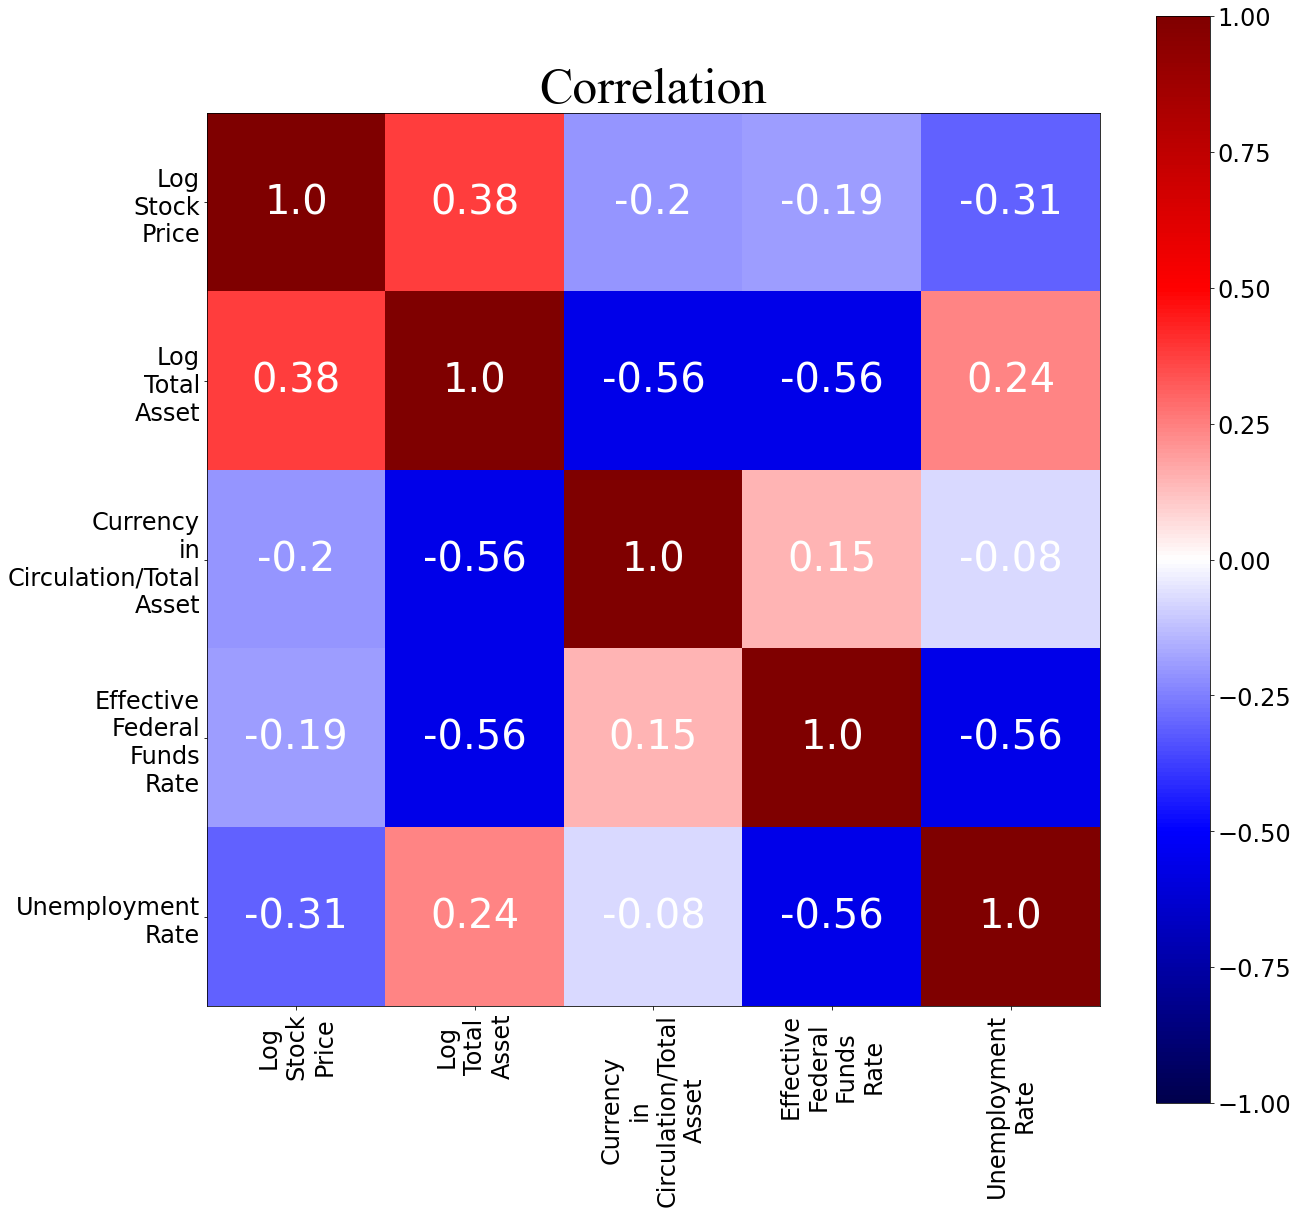

In [33]:
from datlib.plots import *
corr_matrix_heatmap(reg_data.corr())

In [34]:
reg_data.describe().round(2)

Log Stock Price  Log Total Asset  Currency in Circulation/Total Asset  \
count           262.00           262.00                               262.00   
mean              7.38            12.71                                 0.52   
std               0.42             5.05                                 2.34   
min               6.60             0.00                                 0.00   
25%               7.07            13.61                                 0.00   
50%               7.25            14.68                                 0.00   
75%               7.65            15.29                                 0.00   
max               8.43            15.96                                16.00   

       Effective Federal Funds Rate  Unemployment Rate  
count                        262.00             262.00  
mean                           1.65               5.97  
std                            1.89               1.95  
min                            0.05               3.50  
25%                            0.13               4.60  
50%                            1.01               5.45  
75%                            2.39               6.90  
max                            6.54              14.80

In [35]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"]=1
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Log Stock Price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     37.71
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           8.20e-25
Time:                        10:30:35   Log-Likelihood:                -81.411
No. Observations:                 262   AIC:                             172.8
Df Residuals:                     257   BIC:                             190.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Log Total Asset                         0.0258      0.006      4.232      0.000       0.014       0.038
Currency in Circulation/Total Asset    -0.0042      0.011     -0.385      0.701      -0.026       0.017
Effective Federal Funds Rate           -0.0754      0.016     -4.713      0.000      -0.107      -0.044
Unemployment Rate                      -0.1238      0.013     -9.582      0.000      -0.149      -0.098
Constant                                7.9149      0.141     56.248      0.000       7.638       8.192
==============================================================================
Omnibus:                       47.332   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.752
Skew:                           0.917   Prob(JB):                     2.66e-21
Kurtosis:                       5.305   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
est.pvalues

const                                  0.009828
Effective Federal Funds Rate           0.762914
Log Total Asset                        0.490391
Currency in Circulation/Total Asset    0.164226
Unemployment Rate                      0.000266
dtype: float64

In [37]:
keys = ['Log Total Asset',
         'Currency in Circulation/Total Asset',
         'Effective Federal Funds Rate',
         'Unemployment Rate',
         'Log Stock Price']

keys = keys
reg_data = data_updated[keys].dropna()

In [38]:
reg_data

Log Total Asset  Currency in Circulation/Total Asset  \
Date                                                               
2/28/2009         -0.077786                             0.000039   
3/31/2009          0.053397                            -0.000021   
4/30/2009          0.067534                            -0.000028   
5/31/2009          0.005147                            -0.000001   
6/30/2009         -0.036956                             0.000017   
...                     ...                                  ...   
6/30/2021          0.020092                            -0.000004   
7/31/2021          0.020202                            -0.000005   
8/31/2021          0.012321                            -0.000003   
9/30/2021          0.015167                            -0.000003   
10/31/2021         0.011563                            -0.000002   

            Effective Federal Funds Rate  Unemployment Rate  Log Stock Price  
Date                                                                          
2/28/2009                           0.07                0.4        -0.116457  
3/31/2009                          -0.04                0.3         0.081953  
4/30/2009                          -0.03                0.4         0.089772  
5/31/2009                           0.03                0.1         0.051721  
6/30/2009                           0.03                0.0         0.000196  
...                                  ...                ...              ...  
6/30/2021                           0.02               -0.5         0.021971  
7/31/2021                           0.02               -0.2         0.022493  
8/31/2021                          -0.01               -0.4         0.028578  
9/30/2021                          -0.01               -0.2        -0.048738  
10/31/2021                          0.00               -0.4         0.066858  

[153 rows x 5 columns]

In [39]:
keys = ['Log Total Asset',
         'Currency in Circulation/Total Asset',
         'Effective Federal Funds Rate',
         'Unemployment Rate',
         'Log Stock Price']

keys = keys
reg_data = data_updated[keys].dropna()

In [40]:
reg_data

Log Total Asset  Currency in Circulation/Total Asset  \
Date                                                               
2/28/2009         -0.077786                             0.000039   
3/31/2009          0.053397                            -0.000021   
4/30/2009          0.067534                            -0.000028   
5/31/2009          0.005147                            -0.000001   
6/30/2009         -0.036956                             0.000017   
...                     ...                                  ...   
6/30/2021          0.020092                            -0.000004   
7/31/2021          0.020202                            -0.000005   
8/31/2021          0.012321                            -0.000003   
9/30/2021          0.015167                            -0.000003   
10/31/2021         0.011563                            -0.000002   

            Effective Federal Funds Rate  Unemployment Rate  Log Stock Price  
Date                                                                          
2/28/2009                           0.07                0.4        -0.116457  
3/31/2009                          -0.04                0.3         0.081953  
4/30/2009                          -0.03                0.4         0.089772  
5/31/2009                           0.03                0.1         0.051721  
6/30/2009                           0.03                0.0         0.000196  
...                                  ...                ...              ...  
6/30/2021                           0.02               -0.5         0.021971  
7/31/2021                           0.02               -0.2         0.022493  
8/31/2021                          -0.01               -0.4         0.028578  
9/30/2021                          -0.01               -0.2        -0.048738  
10/31/2021                          0.00               -0.4         0.066858  

[153 rows x 5 columns]

## Residuals

In [41]:
import statsmodels.api as sm

residuals = {}
for y_var in reg_data.keys():
    X_vars = list(reg_data.keys())
    X_vars.remove(y_var)
    X = reg_data[X_vars]
    # Initial estimate should include constant
    #   This won't be the case we regress the errors
    X["Constant"] = 1
    # pass y_var as list for consistent structure
    y = reg_data[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

In [42]:
residuals

Log Total Asset  Currency in Circulation/Total Asset  \
Date                                                               
2/28/2009          0.025936                         1.085385e-05   
3/31/2009         -0.010450                        -4.648376e-06   
4/30/2009         -0.014651                        -6.642536e-06   
5/31/2009         -0.002643                        -9.785548e-07   
6/30/2009          0.003947                         2.439208e-06   
...                     ...                                  ...   
6/30/2021          0.001716                         4.044056e-07   
7/31/2021          0.001734                         3.081939e-07   
8/31/2021         -0.003713                        -1.201827e-06   
9/30/2021         -0.000907                        -5.468249e-07   
10/31/2021        -0.001167                        -1.965537e-07   

            Effective Federal Funds Rate  Unemployment Rate  Log Stock Price  
Date                                                                          
2/28/2009                      -0.033998           0.314607        -0.065708  
3/31/2009                       0.051272           0.411219         0.049893  
4/30/2009                       0.087640           0.580437         0.050235  
5/31/2009                       0.026993           0.360677         0.041632  
6/30/2009                      -0.049160          -0.094019         0.010875  
...                                  ...                ...              ...  
6/30/2021                       0.012283          -0.120149         0.000153  
7/31/2021                       0.031372           0.152518         0.005321  
8/31/2021                      -0.031738          -0.400915         0.007428  
9/30/2021                      -0.012284          -0.459866        -0.065230  
10/31/2021                     -0.018987          -0.101418         0.047645  

[153 rows x 5 columns]

In [43]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

Log Total Asset  \
Log Total Asset                                 1.00   
Currency in Circulation/Total Asset            -0.96   
Effective Federal Funds Rate                   -0.31   
Unemployment Rate                              -0.36   
Log Stock Price                                -0.06   

                                     Currency in Circulation/Total Asset  \
Log Total Asset                                                    -0.96   
Currency in Circulation/Total Asset                                 1.00   
Effective Federal Funds Rate                                       -0.13   
Unemployment Rate                                                  -0.28   
Log Stock Price                                                    -0.11   

                                     Effective Federal Funds Rate  \
Log Total Asset                                             -0.31   
Currency in Circulation/Total Asset                         -0.13   
Effective Federal Funds Rate                                 1.00   
Unemployment Rate                                           -0.68   
Log Stock Price                                             -0.02   

                                     Unemployment Rate  Log Stock Price  
Log Total Asset                                  -0.36            -0.06  
Currency in Circulation/Total Asset              -0.28            -0.11  
Effective Federal Funds Rate                     -0.68            -0.02  
Unemployment Rate                                 1.00            -0.29  
Log Stock Price                                  -0.29             1.00

In [44]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

Log Total Asset  \
Log Total Asset                                  NaN   
Currency in Circulation/Total Asset             0.00   
Effective Federal Funds Rate                    0.00   
Unemployment Rate                               0.00   
Log Stock Price                                 0.48   

                                     Currency in Circulation/Total Asset  \
Log Total Asset                                                     0.00   
Currency in Circulation/Total Asset                                  NaN   
Effective Federal Funds Rate                                        0.12   
Unemployment Rate                                                   0.00   
Log Stock Price                                                     0.16   

                                     Effective Federal Funds Rate  \
Log Total Asset                                              0.00   
Currency in Circulation/Total Asset                          0.12   
Effective Federal Funds Rate                                  NaN   
Unemployment Rate                                            0.00   
Log Stock Price                                              0.76   

                                     Unemployment Rate  Log Stock Price  
Log Total Asset                                    0.0             0.48  
Currency in Circulation/Total Asset                0.0             0.16  
Effective Federal Funds Rate                       0.0             0.76  
Unemployment Rate                                  NaN             0.00  
Log Stock Price                                    0.0              NaN

In [53]:
import pingouin
from pgmpy.estimators import PC
c = PC(reg_data[keys].dropna())
max_cond_vars = len(keys) - 2

sig = 0.5
model = c.estimate(return_type = "dag", variant = "parallel",
                  significance_level = sig,
                  max_cond_vars = max_cond_vars, ci_test = "pearsonr")

edges = model.edges()
pcorr = reg_data.pcorr()
weights = {}

  0%|          | 0/3 [00:00<?, ?it/s]

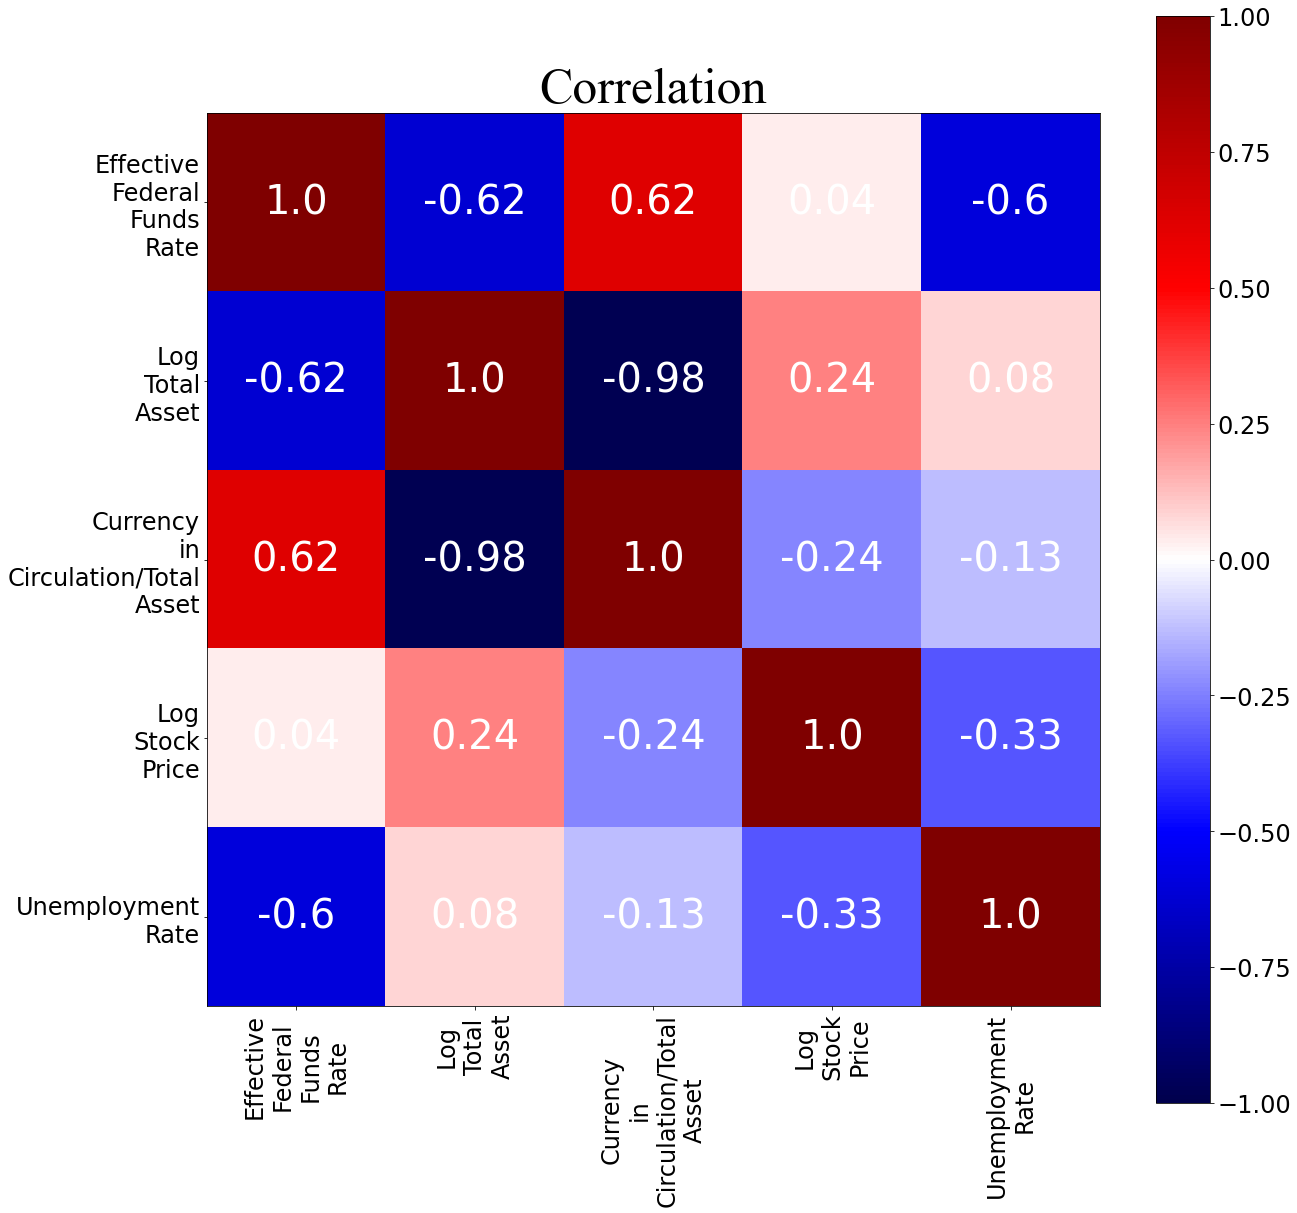

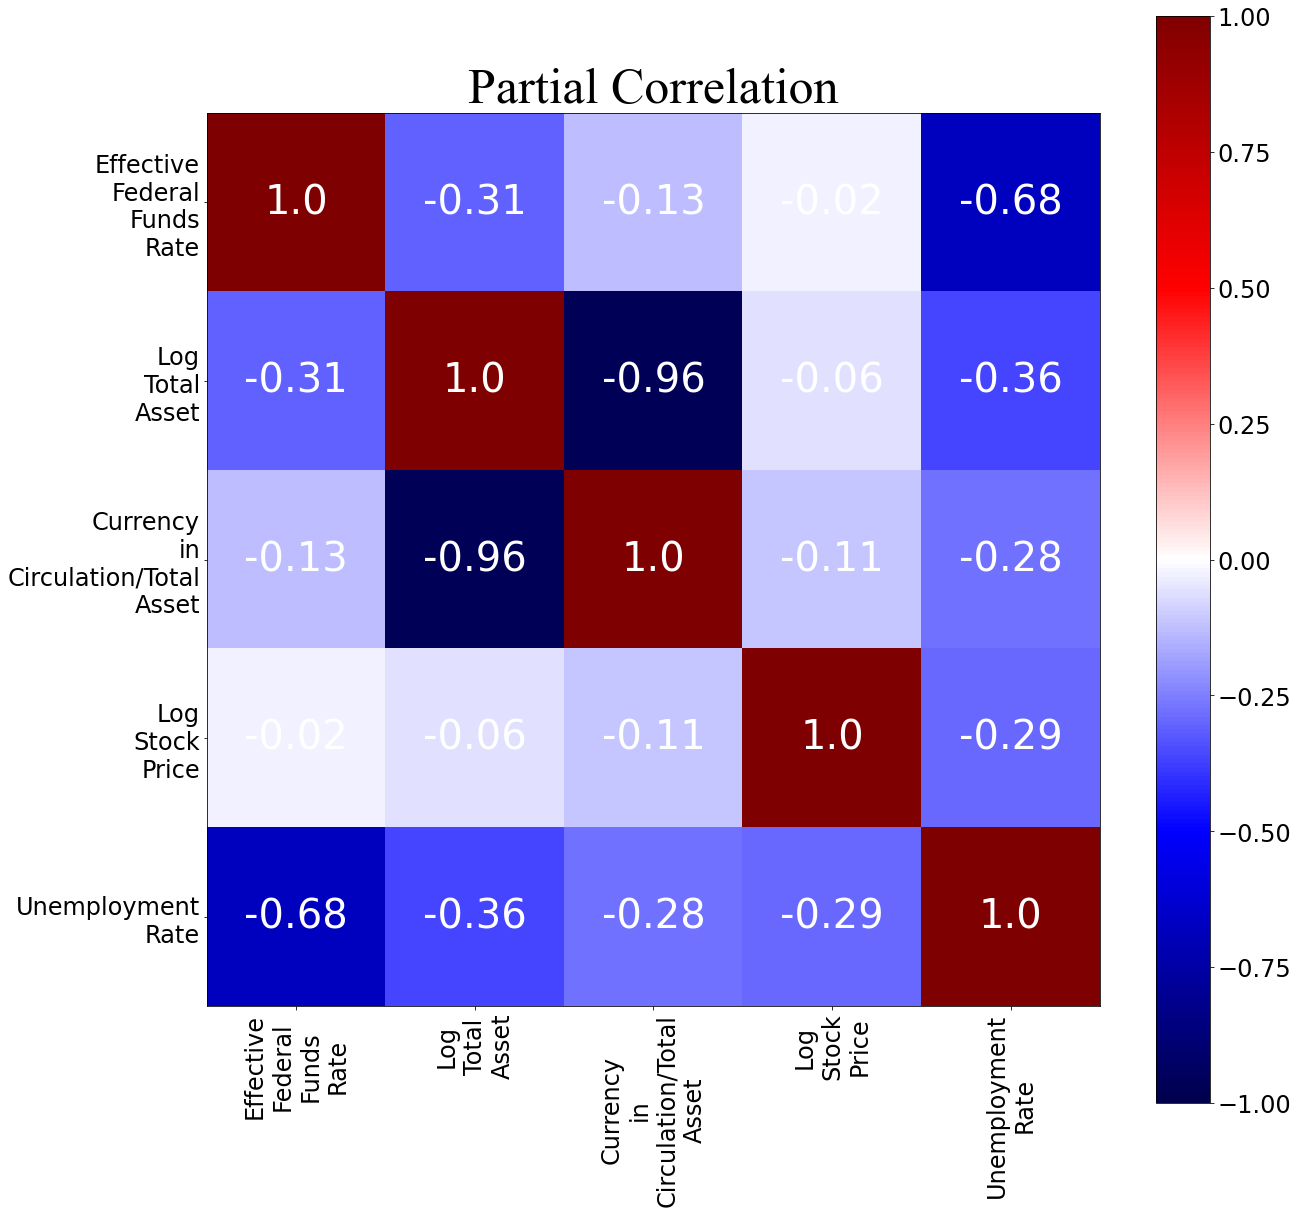

In [54]:
from datlib.plots import *
corr_matrix_heatmap(data_updated.corr(), 
                    save_fig = False, 
                    pp = None, 
                    title = "Correlation")
corr_matrix_heatmap(data_updated.pcorr(), save_fig = False, pp = None, title = "Partial Correlation")

## Using partial correlations to build a causal skeleton

In [55]:
undirected_graph = {key:[] for key in reg_data.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in reg_data.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'Log Total Asset': ['Currency in Circulation/Total Asset',
  'Effective Federal Funds Rate',
  'Unemployment Rate',
  'Log Stock Price'],
 'Currency in Circulation/Total Asset': ['Log Total Asset',
  'Effective Federal Funds Rate',
  'Unemployment Rate',
  'Log Stock Price'],
 'Effective Federal Funds Rate': ['Log Total Asset',
  'Currency in Circulation/Total Asset',
  'Unemployment Rate',
  'Log Stock Price'],
 'Unemployment Rate': ['Log Total Asset',
  'Currency in Circulation/Total Asset',
  'Effective Federal Funds Rate',
  'Log Stock Price'],
 'Log Stock Price': ['Log Total Asset',
  'Currency in Circulation/Total Asset',
  'Effective Federal Funds Rate',
  'Unemployment Rate']}

In [45]:
undirected_graph = {key:[] for key in reg_data.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in reg_data.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph 

{'Log Total Asset': ['Currency in Circulation/Total Asset',
  'Effective Federal Funds Rate',
  'Unemployment Rate',
  'Log Stock Price'],
 'Currency in Circulation/Total Asset': ['Log Total Asset',
  'Effective Federal Funds Rate',
  'Unemployment Rate',
  'Log Stock Price'],
 'Effective Federal Funds Rate': ['Log Total Asset',
  'Currency in Circulation/Total Asset',
  'Unemployment Rate',
  'Log Stock Price'],
 'Unemployment Rate': ['Log Total Asset',
  'Currency in Circulation/Total Asset',
  'Effective Federal Funds Rate',
  'Log Stock Price'],
 'Log Stock Price': ['Log Total Asset',
  'Currency in Circulation/Total Asset',
  'Effective Federal Funds Rate',
  'Unemployment Rate']}

In [56]:
import copy
p_val = .01
def build_skeleton(reg_data, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:

                c_used.append(c_var)
                test = reg_data.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in reg_data.keys():
        ys = undirected_graph[x]
        for y in reg_data.keys():
            if x != y:
            # first check for correlation with no controls
                test = reg_data.partial_corr(x = x, 
                                       y = y, 
                                       covar = None,
                                       method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                    control_vars = [z for z in reg_data.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(reg_data, undirected_graph)                                   
undirected_graph

{'Log Total Asset': ['Currency in Circulation/Total Asset'],
 'Currency in Circulation/Total Asset': ['Log Total Asset'],
 'Effective Federal Funds Rate': ['Unemployment Rate'],
 'Unemployment Rate': ['Effective Federal Funds Rate', 'Log Stock Price'],
 'Log Stock Price': ['Unemployment Rate']}

In [57]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, reg_data, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    pcorr_matrix = reg_data.pcorr()
    graph = nx.Graph()
    edges = [['Effective Federal Funds Rate', 'Log Stock Price'], ['Log Stock Price', 'Log Total Asset'], ['Log Stock Price', 'Unemployment Rate'], ['Log Stock Price', 'Currency in Circulation/Total Asset']]
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                # edge label is partial correlation between
                # key and key2
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.show()

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

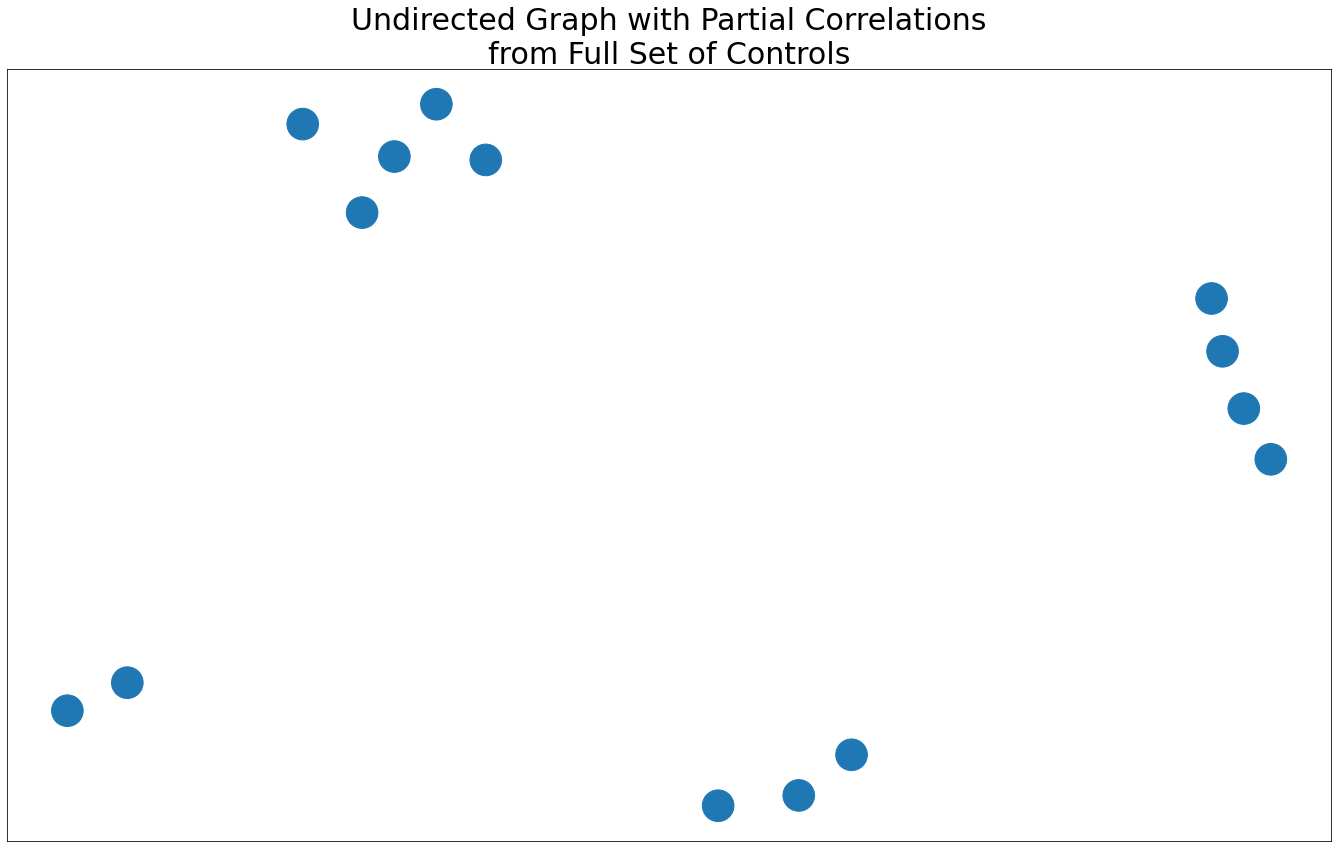

In [58]:
graph_DAG(undirected_graph, reg_data, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")

In [59]:
import matplotlib.pyplot as plt
import networkx as nx

In [60]:
import pingouin
from pgmpy.estimators import PC
c = PC(reg_data[keys].dropna())
max_cond_vars = len(keys) - 2

sig = 0.5
model = c.estimate(return_type = "dag", variant = "parallel",
                  significance_level = sig,
                  max_cond_vars = max_cond_vars, ci_test = "pearsonr")

edges = [['Effective Federal Funds Rate', 'Log Stock Price'], ['Log Stock Price', 'Log Total Asset'], ['Log Stock Price', 'Unemployment Rate'], ['Log Stock Price', 'Currency in Circulation/Total Asset']]
G = nx.Graph()

edges = model.edges()
pcorr = reg_data.pcorr()
weights = {}

  0%|          | 0/3 [00:00<?, ?it/s]

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

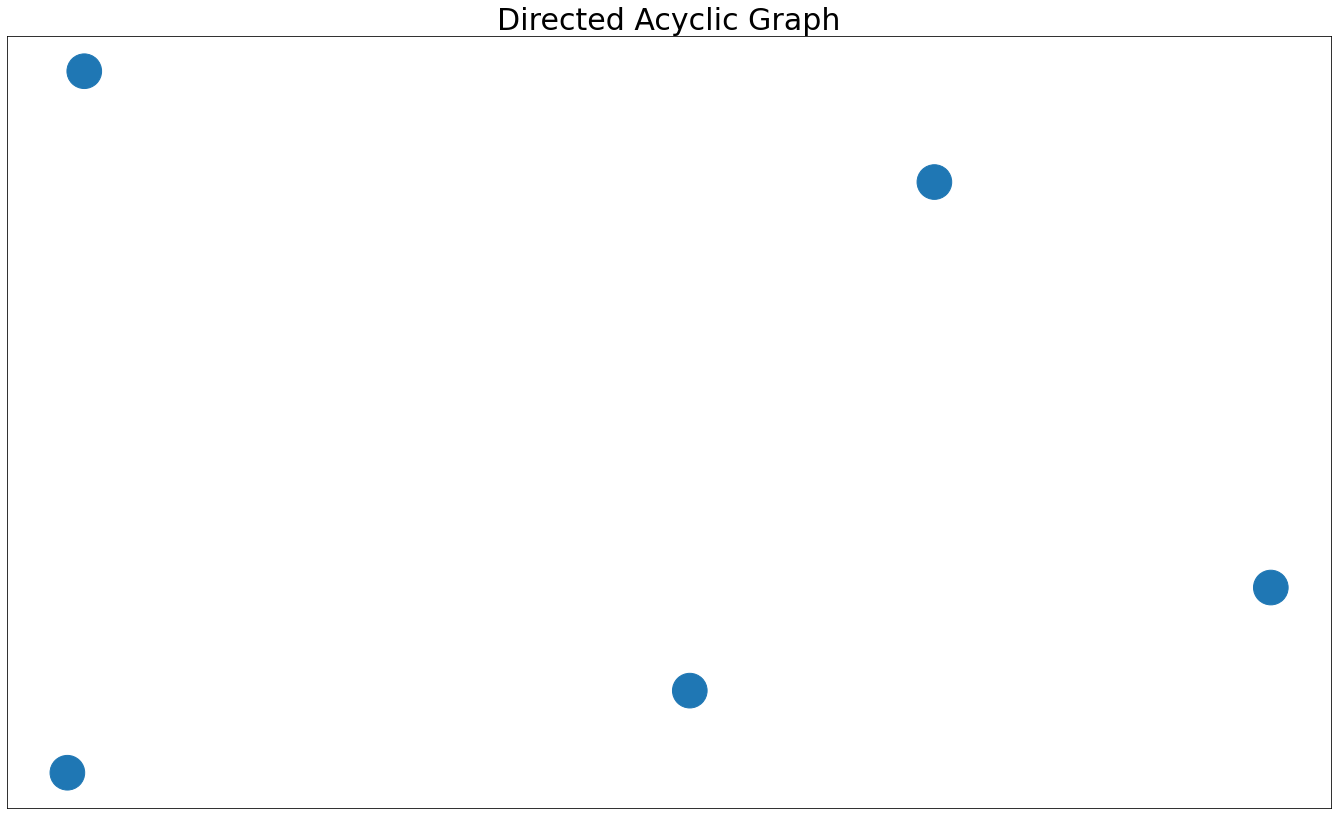

In [51]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, reg_data, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, reg_data, title = "Directed Acyclic Graph")
edges

In [61]:
from pgmpy.estimators import PC
c = PC(reg_data)
max_cond_vars = len(reg_data.keys()) - 2


model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/3 [00:00<?, ?it/s]

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

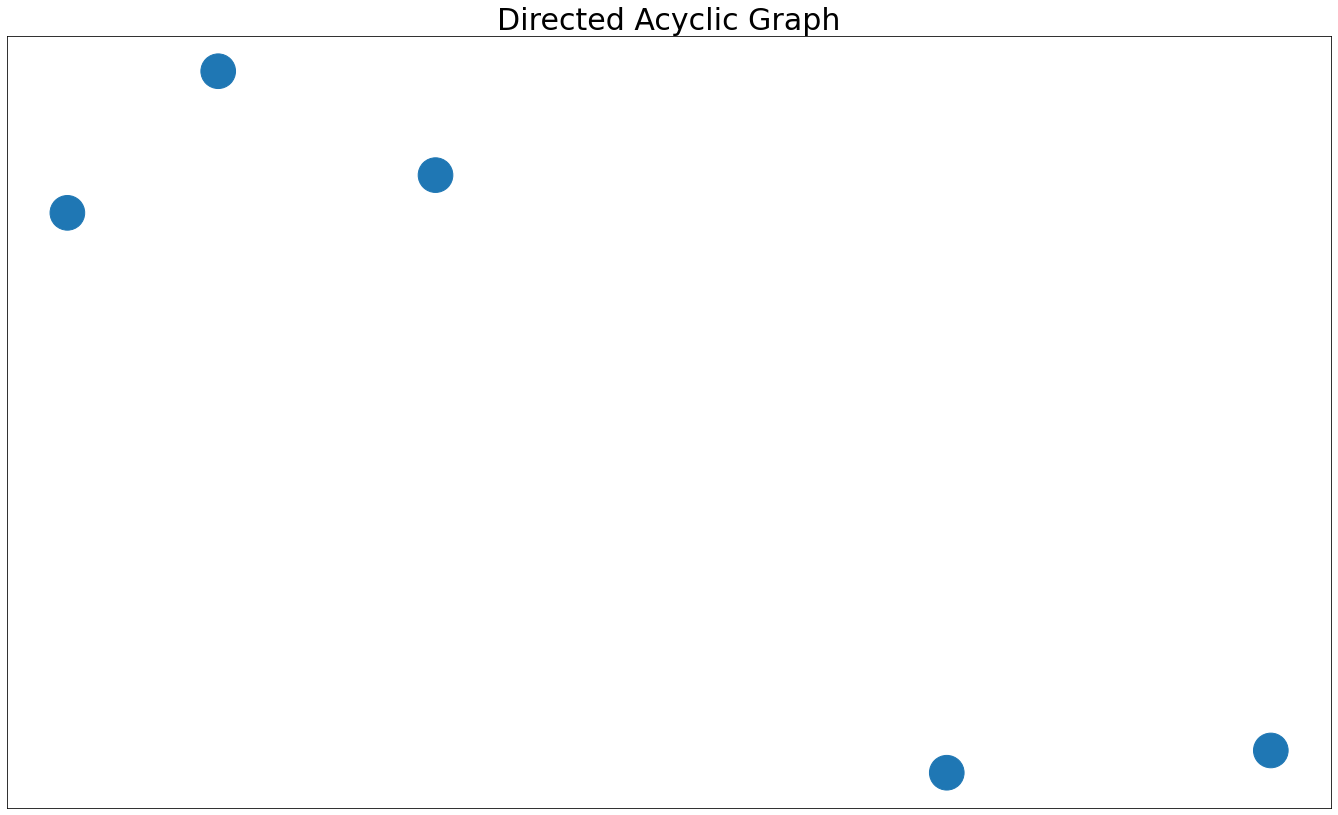

In [62]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, reg_data, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, reg_data, title = "Directed Acyclic Graph")
edges

keep control: Log Stock Price
('Effective Federal Funds Rate', 'Unemployment Rate') ['Log Stock Price']
keep control: Effective Federal Funds Rate
('Log Stock Price', 'Unemployment Rate') ['Effective Federal Funds Rate']
('Log Total Asset', 'Currency in Circulation/Total Asset') []


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

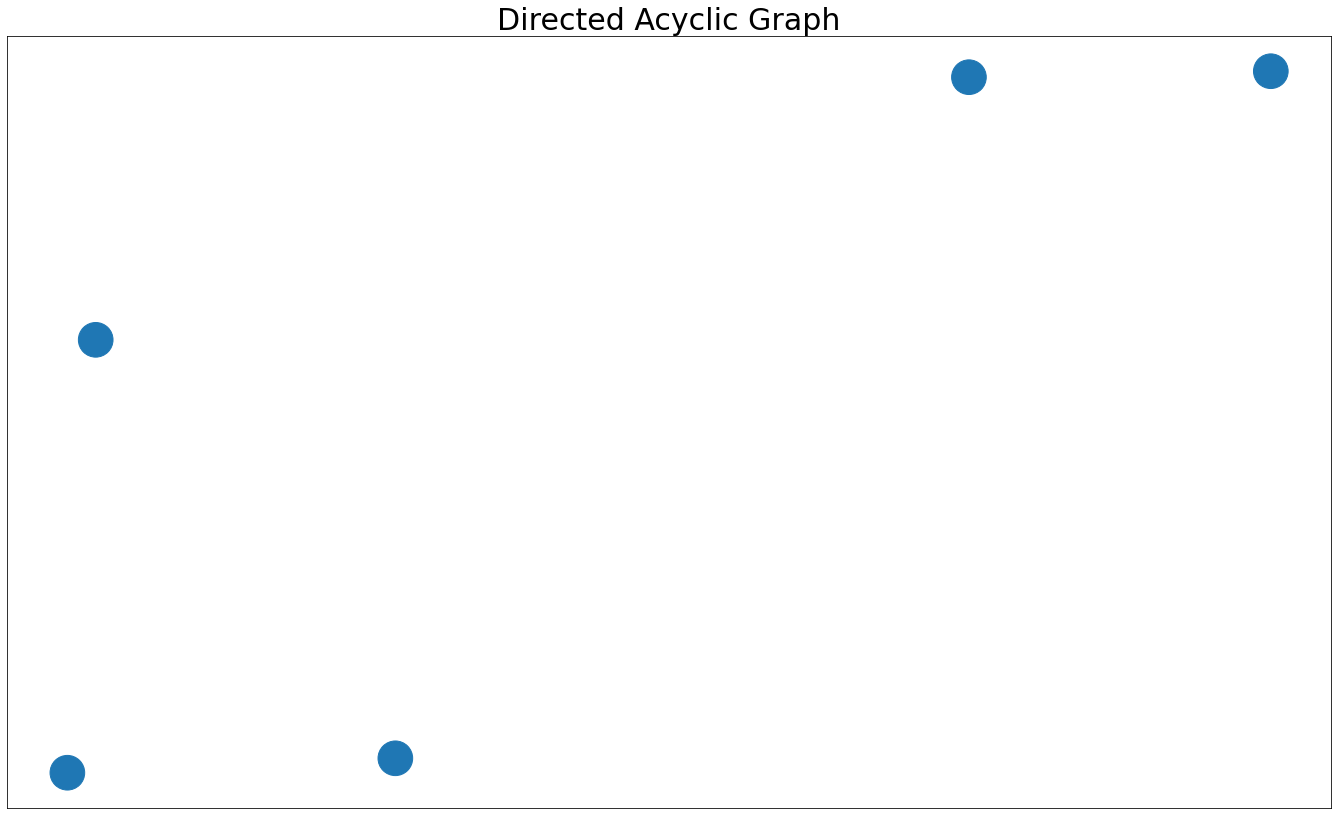

In [63]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    ############ Add ############
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = reg_data[[edge[0], edge[1]]+keep_controls].pcorr()
#         corr_matrix_heatmap(pcorr, save_fig = False, pp = None, title = "Partial Correlation")
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     # turn text black for larger variable names in homework
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    ############ Add ############
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

graph_DAG(edges, reg_data, title = "Directed Acyclic Graph")

In [ ]:
here "Log stock price" is my dependent variable (Y)